Command to create jupyter kernel to python virtual env.
python -m ipykernel install --user --name myenv --display-name "Python (myenv)"

In [2]:
import numpy as np
import h5py


def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

y = [1], it's a 'cat' picture.


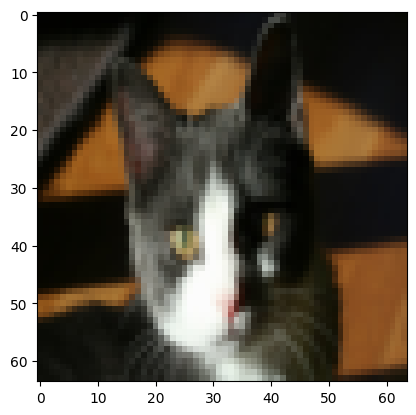

In [4]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()

index = 19
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

print("The size of train set is "+str(m_train)+".")
print("The size of test set is "+str(m_test)+".")
print("The size of image pixels is "+str(num_px)+"x"+str(num_px)+".")

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print("The shape of train set is: "+str(train_set_x_flatten.shape))
print("The shape of test set is: "+str(test_set_x_flatten.shape))

train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

The size of train set is 209.
The size of test set is 50.
The size of image pixels is 64x64.
The shape of train set is: (12288, 209)
The shape of test set is: (12288, 50)


In [7]:
def sigmoid(z):
  z = np.clip(z, -500, 500)
  return 1/(1+np.exp(-z))

w = np.random.rand(train_set_x.shape[0],1)
b = np.random.random()
print("Initial weights: "+str(w))
print("Initial bias: "+str(b))

weight = w * 0.01
bias = b * 0.01
alpha = 0.09
number_of_iterations = 2500
for i in range(number_of_iterations):
  z = np.dot(weight.T,train_set_x) + bias
  a = sigmoid(z)
  a = np.clip(a, 1e-5, 1 - 1e-5)
  dz = a - train_set_y
  dw = (1/train_set_x.shape[0]) * np.dot(train_set_x,dz.T)
  db = (1/train_set_x.shape[0]) * np.sum(dz,axis=1)
  weight = weight - alpha * dw
  bias = bias - alpha * db
  cost = (- 1 / train_set_x.shape[0]) * np.sum(train_set_y * np.log(a) + (1 - train_set_y) * (np.log(1 - a)))
  if i%100==0:
    print("Cost after "+str(i)+"th iteration is "+str(cost)+".")

# Testing
z = np.dot(weight.T,test_set_x) + bias
a = sigmoid(z)

prediction = (a>0.5).astype(int)

print("Output Z : "+str(z))
print("Output : "+str(a))
print("Prediction :" + str(prediction))
print("Number of predictions: "+str(prediction.shape))

# Single node prediction - Accuracy = 0.74

Initial weights: [[0.64201561]
 [0.62705929]
 [0.47330613]
 ...
 [0.47271459]
 [0.12565927]
 [0.60416174]]
Initial bias: 0.18269442471013642
Cost after 0th iteration is 0.12646072431249034.
Cost after 100th iteration is 0.009619155290304703.
Cost after 200th iteration is 0.008903162254656587.
Cost after 300th iteration is 0.008366631963545137.
Cost after 400th iteration is 0.0079286628382051.
Cost after 500th iteration is 0.007555816911351401.
Cost after 600th iteration is 0.007230213183164767.
Cost after 700th iteration is 0.006940920301243003.
Cost after 800th iteration is 0.006680642125930447.
Cost after 900th iteration is 0.006444199901889045.
Cost after 1000th iteration is 0.0062277502399387934.
Cost after 1100th iteration is 0.006028343875260793.
Cost after 1200th iteration is 0.005843658248908591.
Cost after 1300th iteration is 0.0056718260367723755.
Cost after 1400th iteration is 0.005511320163751857.
Cost after 1500th iteration is 0.00536087386141211.
Cost after 1600th iterati

In [13]:
def sigmoid(z):
  z = np.clip(z, -500, 500)
  return 1/(1+np.exp(-z))

def relu(z):
  return np.maximum(0,z)

A = np.empty(5, dtype=object)
W = np.empty(5, dtype=object)
B = np.empty(5, dtype=object)
Z = np.empty(5, dtype=object)

dA = np.empty(5, dtype=object)
dW = np.empty(5, dtype=object)
dB = np.empty(5, dtype=object)
dZ = np.empty(5, dtype=object)

A[0] = train_set_x

W[1] = np.random.rand(12288,512)*0.05
W[2] = np.random.rand(512,256)*0.05
W[3] = np.random.rand(256,128)*0.05
W[4] = np.random.rand(128,1)*0.05

B[1] = np.random.rand(512,1)*0.05
B[2] = np.random.rand(256,1)*0.05
B[3] = np.random.rand(128,1)*0.05
B[4] = np.random.rand(1,1)*0.05

alpha = 0.025
for i in range(150):
  for l in range(1,5):
    Z[l] = np.dot(W[l].T,A[l-1])+B[l]
    if l==4:
      A[l] = sigmoid(Z[l])
    else:
      A[l] = relu(Z[l])

  A[4] = np.clip(A[4], 1e-5 ,1 - 1e-5)
  cost = -1*np.mean((train_set_y*np.log(A[4]))+(1 - train_set_y)*np.log(1 - A[4]), axis=1,keepdims=True)
  if(i%10==0):
    print("The cost at "+str(i)+"th iteration is "+str(cost)+".")

  #dA[4] = np.sum(((1-train_set_y)/(1-A[4]))-(train_set_y/A[4]), axis=1, keepdims=True)

  for l in range(4,0,-1):
    if(l==4):
      #dZ[l] = dA[l] * ((A[l])*(1-A[l]))
      dZ[l] = (A[l] - train_set_y) / train_set_y.shape[1]
    else:
      dZ[l] = dA[l] * ((Z[l]>=0).astype(int))

    dW[l] = (1/train_set_y.shape[1])*np.dot(dZ[l],A[l-1].T)
    dB[l] = (1/train_set_y.shape[1])*np.sum(dZ[l],axis=1,keepdims=True)
    dA[l-1] = np.dot(W[l],dZ[l])

    W[l] = W[l] - alpha * (dW[l].T)
    B[l] = B[l] - alpha * dB[l]

A_test = np.empty(5, dtype=object)
A_test[0] = test_set_x
for l in range(1,5):
  Z[l] = np.dot(W[l].T,A_test[l-1])+B[l]
  if l==4:
    A_test[l] = sigmoid(Z[l])
  else:
    A_test[l] = relu(Z[l])

print(str(A[3]))
prediction = (A_test[4]>0.5).astype(int)

# DNN 4 layer - Accuracy=0.66

The cost at 0th iteration is [[7.54675363]].
The cost at 10th iteration is [[0.69376804]].
The cost at 20th iteration is [[0.69373875]].
The cost at 30th iteration is [[0.69370948]].
The cost at 40th iteration is [[0.69368023]].
The cost at 50th iteration is [[0.693651]].
The cost at 60th iteration is [[0.69362178]].
The cost at 70th iteration is [[0.69359258]].
The cost at 80th iteration is [[0.69356339]].
The cost at 90th iteration is [[0.69353423]].
The cost at 100th iteration is [[0.69350508]].
The cost at 110th iteration is [[0.69347595]].
The cost at 120th iteration is [[0.69344684]].
The cost at 130th iteration is [[0.69341774]].
The cost at 140th iteration is [[0.69338866]].
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# Example arrays of shape (1, n)
array1 = test_set_y
array2 = prediction

print(str(prediction))
# Element-wise comparison
elementwise_comparison = (array1 == array2)
print("Element-wise comparison:\n", elementwise_comparison)

# Check if all elements are equal
all_equal = np.all(array1 == array2)
print("All elements are equal:", all_equal)

# Calculate accuracy
correct_predictions = (array1 == array2).sum()
total_predictions = array1.size
accuracy = correct_predictions / total_predictions

print("Accuracy:", accuracy)

# Get indices of incorrect predictions
incorrect_indices = np.where(array1 != array2)[1]

print("Indices of incorrect predictions:", incorrect_indices)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
Element-wise comparison:
 [[ True  True  True  True  True False  True  True  True  True  True  True
   True False False  True False  True  True  True  True False False  True
   True  True  True False  True False  True  True  True  True False False
  False  True False False  True  True  True False False False  True  True
   True False]]
All elements are equal: False
Accuracy: 0.66
Indices of incorrect predictions: [ 5 13 14 16 21 22 27 29 34 35 36 38 39 43 44 45 49]


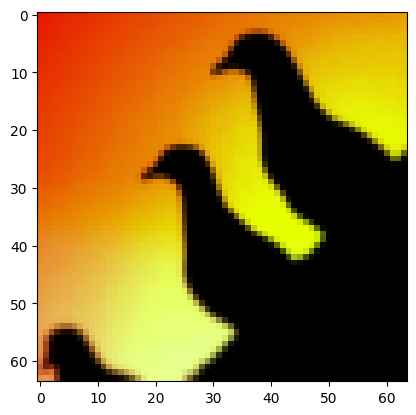

In [12]:
plt.imshow(test_set_x_orig[29])